<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisPredictivo/blob/master/06_SVM/Detecci%C3%B3n_de_Anomal%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine
import urllib.parse
import requests
import pandas as pd

In [100]:
API_BASE_URL = "http://apis.datos.gob.ar/series/api/"
def get_api_call(ids, **kwargs):
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

pf = get_api_call(["89.1_TIPF35D_0_0_35"])
badlar = get_api_call(["89.1_TIB_0_0_20"])

In [102]:
pf=requests.get(pf).json()
badlar=requests.get(badlar).json()

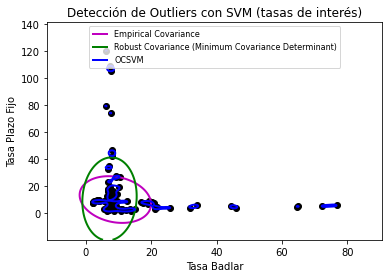

In [104]:
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.,contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)":EllipticEnvelope(contamination=0.25),
    "OCSVM": OneClassSVM(nu=0.2, gamma=0.1)}
colors = ['m', 'g', 'b']
legend2 = {}

# Get data
X2=pd.DataFrame()
X2["pf"]=([row[1] for row in impo["data"]])
X2["badlar"]=([row[1] for row in expo["data"]])
X2=X2.to_numpy()

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(X2[:, 0].min()-X2[:, 0].std(), X2[:, 0].max()+X2[:, 0].std(), 1000), np.linspace(X2[:, 1].min()-X2[:, 1].std(), X2[:, 1].max()+X2[:, 1].std(), 1000))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i])

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)
plt.title("Detección de Outliers con SVM (tasas de interés)")
plt.scatter(X2[:, 0], X2[:, 1], color='black')
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend((legend2_values_list[0].collections[0],
            legend2_values_list[1].collections[0],
            legend2_values_list[2].collections[0]),
           (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
           loc="upper center",
           prop=matplotlib.font_manager.FontProperties(size=8))
plt.ylabel("Tasa Plazo Fijo")
plt.xlabel("Tasa Badlar")

plt.show()